In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
lw_data = pd.read_csv('lw-posts-and-authors.csv')

In [3]:
num_posts = lw_data['titles'].count()
print(f'Number of posts: {num_posts}')

Number of posts: 2347


LessWrong posts over the past 6 months:

In [4]:
authors = []

# get the number of unique authors:
for author_string in lw_data['authors']:
    author_list = author_string.split(',')
    for name in author_list:
        authors.append(name.strip())

unique_authors = set(authors)
print(f'Number of unique authors: {len(unique_authors)}')

Number of unique authors: 889


In [5]:
# Graph the authors on a bar chart:

from collections import defaultdict

name_counts = defaultdict(int)

for author in authors:
    name_counts[author] += 1

post_counts = defaultdict(int)

for name, count in name_counts.items():
    post_counts[count] += 1

print(post_counts)

defaultdict(<class 'int'>, {6: 19, 3: 85, 83: 1, 2: 144, 9: 8, 1: 479, 19: 2, 4: 50, 10: 10, 11: 9, 5: 28, 8: 14, 23: 2, 20: 1, 17: 1, 30: 1, 69: 1, 12: 5, 38: 2, 7: 17, 13: 2, 14: 6, 16: 1, 25: 1})


<BarContainer object of 83 artists>

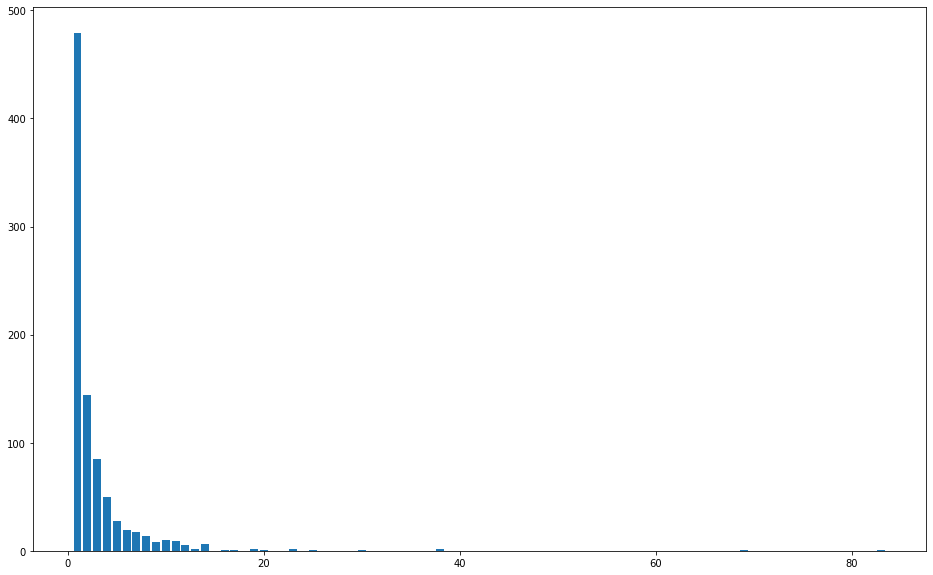

In [6]:
x = [n for n in range(1, max(post_counts.keys()) + 1)]
height = [post_counts[n] if n in post_counts.keys() else 0 for n in x]

fig, ax = plt.subplots(figsize=(16, 10))
plt.bar(x, height)


<BarContainer object of 79 artists>

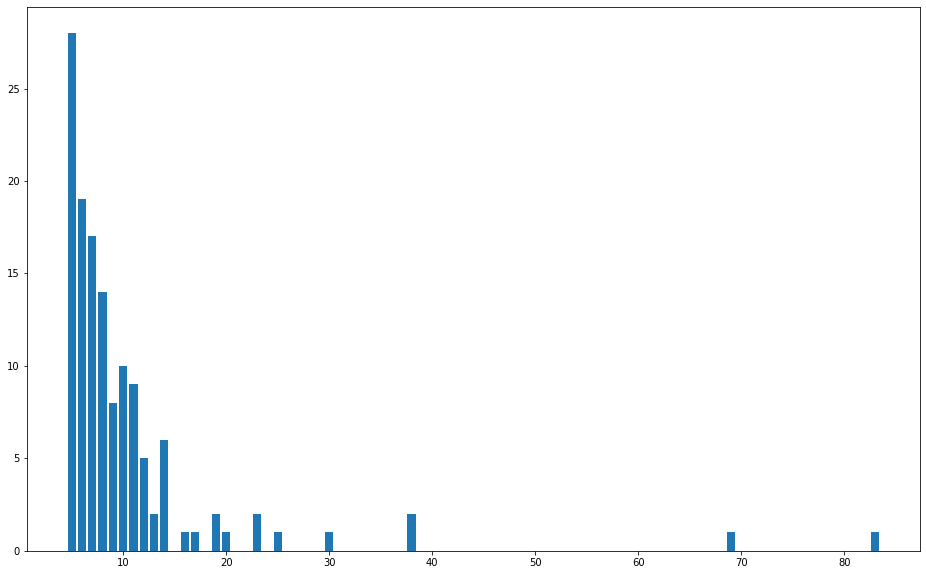

In [7]:
x = [n for n in range(5, max(post_counts.keys()) + 1)]
height = [post_counts[n] if n in post_counts.keys() else 0 for n in x]

fig, ax = plt.subplots(figsize=(16, 10))
plt.bar(x, height)

Find the number of posts that mention AI or AI safety.

In [8]:
from string import punctuation
import re

keywords = {'ai', 'alignment', 'safety', 'agi'}

total_sentences, ai_sentences = 0, 0
ai_authors = []

for index, row in lw_data.iterrows():
    title, authors = row['titles'], row['authors']
    title = re.sub('\W+', ' ', title).lower()
    title_words = set(title.split())
    if keywords.intersection(title_words):
        for author in authors.split(','):
            ai_authors.append(author.strip())
        ai_sentences += 1
    total_sentences += 1

print(f'total sentences: {total_sentences}, ai sentences: {ai_sentences}')
print(f'fraction of ai sentences: {ai_sentences / total_sentences}')

print(f'Number of unique AI authors:', len(set(ai_authors)))

total sentences: 2347, ai sentences: 503
fraction of ai sentences: 0.21431614827439285
Number of unique AI authors: 342


defaultdict(<class 'int'>, {2: 55, 1: 231, 3: 25, 4: 16, 13: 1, 5: 6, 6: 3, 10: 2, 8: 1, 11: 1, 7: 1})
total: 342
total with 2 or more posts: 111
total with 3 or more posts: 56


<BarContainer object of 13 artists>

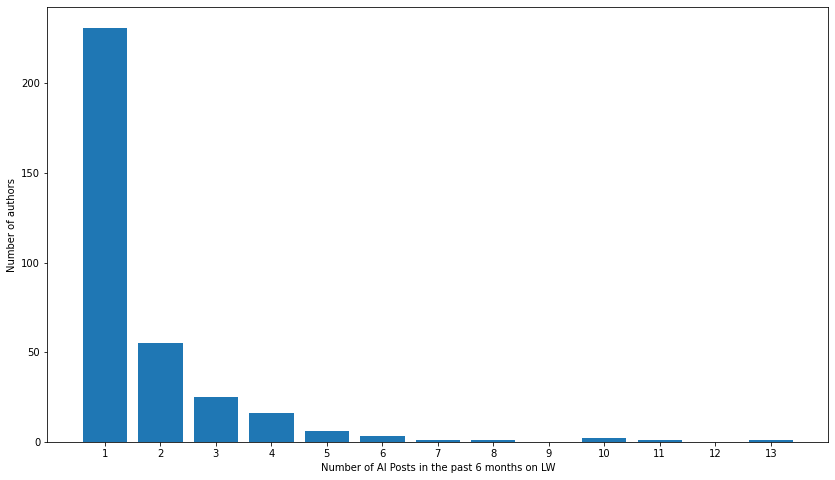

In [9]:
import collections

author_counts = collections.Counter(ai_authors)

post_counts = defaultdict(int)
for name, count in author_counts.items():
    post_counts[count] += 1

print(post_counts)
print(f'total: {sum(post_counts.values())}')
print(f'total with 2 or more posts: {sum([post_counts[k] for k in post_counts.keys() if k >= 2])}')
print(f'total with 3 or more posts: {sum([post_counts[k] for k in post_counts.keys() if k >= 3])}')

x = [n for n in range(1, max(post_counts.keys()) + 1)]
heights = [post_counts[n] if n in post_counts.keys() else 0 for n in x]

fig, ax = plt.subplots(figsize=(14, 8))

ax.set_xticks(x)
ax.set_xlabel('Number of AI Posts in the past 6 months on LW')
ax.set_ylabel('Number of authors')

ax.bar(x, heights)

In [10]:
unique_authors = set(ai_authors)

df = pd.DataFrame({'authors': list(unique_authors)})
df.to_csv('lw-ai-authors.csv')

Find the number of ai authors who are on LessWrong but not the Alignment Forum.

In [11]:
lw_ai_authors = set(unique_authors)
af_ai_authors = set(pd.read_csv('alignment-forum-ai-authors.csv')['authors'].tolist())

print(f'number of LW authors: {len(lw_ai_authors)}')
print(f'number of AF authors: {len(af_ai_authors)}')

# Find the number of authors on LW but not AF:
lw_unique_users = set(lw_ai_authors) - set(af_ai_authors)
print(f'users on LW but not AF: {len(lw_unique_users)}')


number of LW authors: 342
number of AF authors: 151
users on LW but not AF: 293
